### Imports and Data Initialization:

In [521]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, floor
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')

# Standardization using sklearn modules
stand = StandardScaler().fit_transform(df)

# Separation of non-standardized x and y 
x = df['Midterm mark']
y = df['Final mark']

 ### Mean and Standard Deviation Formulas:

In [529]:
# Mean Calculation
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)
print(f'x-mean: {x_mean} \ny-mean: {y_mean}')

# Manual Standardization
x_stand = []
y_stand = []

# Calculating Standard Deviation Constants
x_standard_deviation = sqrt(sum((x - x_mean) ** 2) / len(x))
y_standard_deviation = sqrt(sum((y - y_mean) ** 2) / len(y))
print(f'x-sd: {x_standard_deviation} \ny-sd: {y_standard_deviation}')

# Creating new standardized data and target sets
x_stand = (x-x_mean) / x_standard_deviation
y_stand = (y-y_mean) / y_standard_deviation

# Separated standardized values using sklearn module
x_sk = []
y_sk = []

for i in range(len(stand)):
    x_sk.append(stand[i][0])
    y_sk.append(stand[i][1])

x-mean: 48.959 
y-mean: 72.73500000000001
x-sd: 9.697639867514157 
y-sd: 16.574748112716527


### Error (Cost Function) Formula:

In [517]:
def calculate_error(m, b, x, y):
    return sum((y - (m*x+b)) ** 2)/len(x)

def calculate_error_sk(m, b, x, y):
    s1 = []
    for i in range(len(y_sk)):
        s1.append((y[i] - (m*x[i]+b)) ** 2)
    return sum(s1)/len(x)

### Gradient Partial Derivatives + Updating m and b using learning rate:

In [526]:
def update(updates, a, x, y):
    m, b, a = -0.5, 0, a
    E = []
    for i in range(updates):
        partial_m = 2/len(y) * sum(-x * (y - (m*x + b)))
        partial_b = 2/len(y) * sum(y - (m*x + b))
        m = m - (a * partial_m)
        b = b - (a * partial_b)
        E.append(calculate_error(m, b, x, y))
    return m, b, E

def calculate_sum(m, b):
    partial_m_sk, partial_b_sk = [], []
    for i in range(len(y_sk)):
        partial_m_sk.append(-x_sk[i] * (y_sk[i] - (m * x_sk[i] + b)))
        partial_b_sk.append((y_sk[i] - (m * x_sk[i] + b)))
    partial_m = 2/len(y_sk) * sum(partial_m_sk)
    partial_b = 2/len(y_sk) * sum(partial_b_sk)
    return [partial_m, partial_b]
        
def update_sk(updates, a):
    m, b, a = -0.5, 0, a
    E = []
    for i in range(updates):
        partials = calculate_sum(m, b)
        m = m - (a * partials[0])
        b = b - (a * partials[1])
        E.append(calculate_error_sk(m, b, x_sk, y_sk))
    return m, b, E

### Linear Regression and Error Graph with a=0.0001:

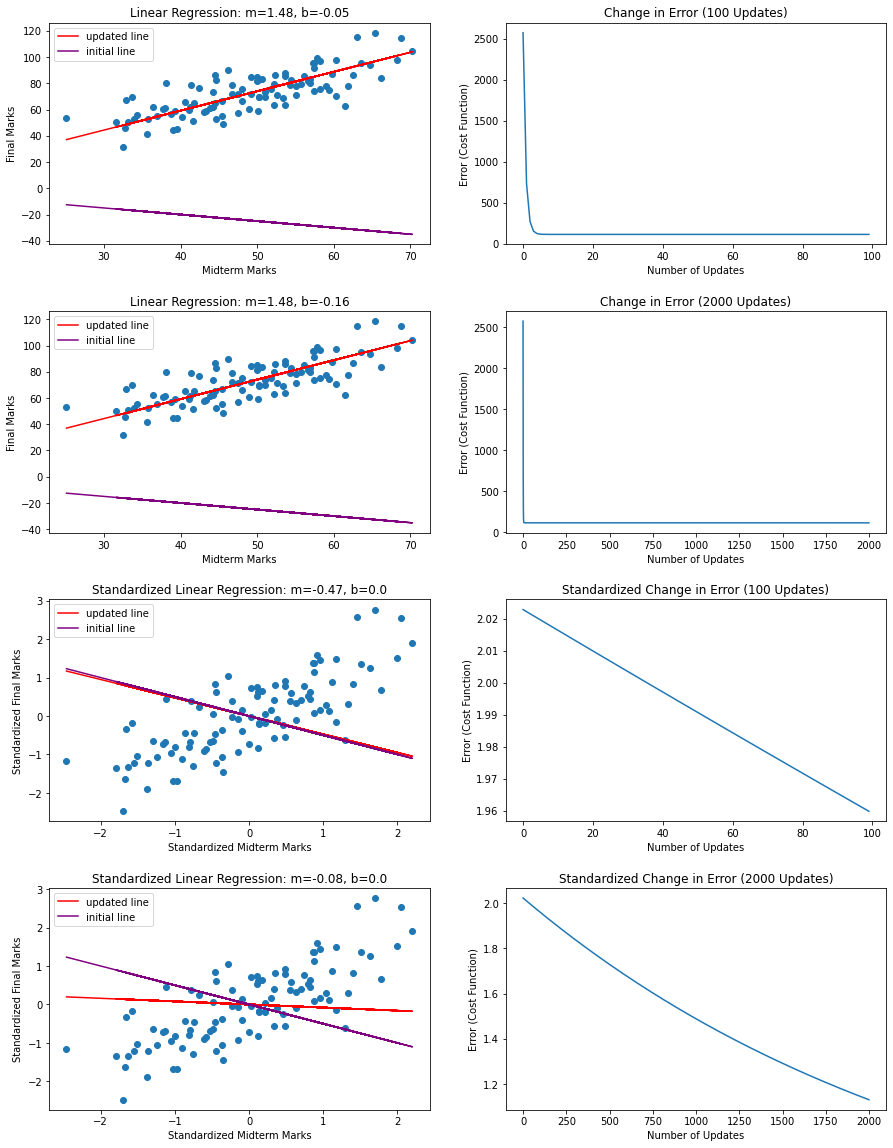

In [473]:
# Non Standardized Linear Regression
m, b, E = update(100, 0.0001, x, y)
initial_line = -0.5 * x + 0
line = m * x + b

# Standardized Linear Regression
m_stand, b_stand, E_stand = update(100, 0.0001, x_stand, y_stand)
initial_line_stand = -0.5 * x_stand + 0
line_stand = m_stand * x_stand + b_stand

%matplotlib inline
# Create four subplots in a 2 by 2 area
fig, pos = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.3)

# Row 0 Left: Non-Standardized with 100 updates
pos[0, 0].scatter(x, y)
pos[0, 0].set_title(f'Linear Regression: m={round(m, 2)}, b={round(b, 2)}')
pos[0, 0].set(xlabel='Midterm Marks', ylabel='Final Marks')
pos[0, 0].plot(x, line, color='red', label='updated line')
pos[0, 0].plot(x, initial_line, color='purple', label='initial line')
pos[0, 0].legend()

# Row 0 Right: Non-Standardized Error Updates with 100 updates
pos[0, 1].set_title(f'Change in Error (100 Updates)')
pos[0, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[0, 1].plot(range(100), E)

# Row 2 Left: Standardized with 100 updates
pos[2, 0].scatter(x_stand, y_stand)
pos[2, 0].set_title(f'Standardized Linear Regression: m={round(m_stand, 2)}, b={round(b_stand, 2)}')
pos[2, 0].set(xlabel='Standardized Midterm Marks', ylabel='Standardized Final Marks')
pos[2, 0].plot(x_stand, line_stand, color='red', label='updated line')
pos[2, 0].plot(x_stand, initial_line_stand, color='purple', label='initial line')
pos[2, 0].legend()

# Row 2 Right: Standardized Error Updates with 100 updates
pos[2, 1].set_title(f'Standardized Change in Error (100 Updates)')
pos[2, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[2, 1].plot(range(100), E_stand)


# Non Standardized Linear Regression
m, b, E = update(2000, 0.0001, x, y)
initial_line = -0.5 * x + 0
line = m * x + b

# Standardized Linear Regression
m_stand, b_stand, E_stand = update(2000, 0.0001, x_stand, y_stand)
initial_line_stand = -0.5 * x_stand + 0
line_stand = m_stand * x_stand + b_stand

# Row 1 Left: Non-Standardized with 2000 updates
pos[1, 0].scatter(x, y)
pos[1, 0].set_title(f'Linear Regression: m={round(m, 2)}, b={round(b, 2)}')
pos[1, 0].set(xlabel='Midterm Marks', ylabel='Final Marks')
pos[1, 0].plot(x, line, color='red', label='updated line')
pos[1, 0].plot(x, initial_line, color='purple', label='initial line')
pos[1, 0].legend()

# Row 1 Right: Non-Standardized Error Updates with 2000 updates
pos[1, 1].set_title(f'Change in Error (2000 Updates)')
pos[1, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[1, 1].plot(range(2000), E)

# Row 3 Left: Standardized with 2000 updates
pos[3, 0].scatter(x_stand, y_stand)
pos[3, 0].set_title(f'Standardized Linear Regression: m={round(m_stand, 2)}, b={round(b_stand, 2)}')
pos[3, 0].set(xlabel='Standardized Midterm Marks', ylabel='Standardized Final Marks')
pos[3, 0].plot(x_stand, line_stand, color='red', label='updated line')
pos[3, 0].plot(x_stand, initial_line_stand, color='purple', label='initial line')
pos[3, 0].legend()

# Row 3 Right: Standardized Error Updates with 2000 updates
pos[3, 1].set_title(f'Standardized Change in Error (2000 Updates)')
pos[3, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[3, 1].plot(range(2000), E_stand)

### Linear Regression and Error Graph with a=0.1:

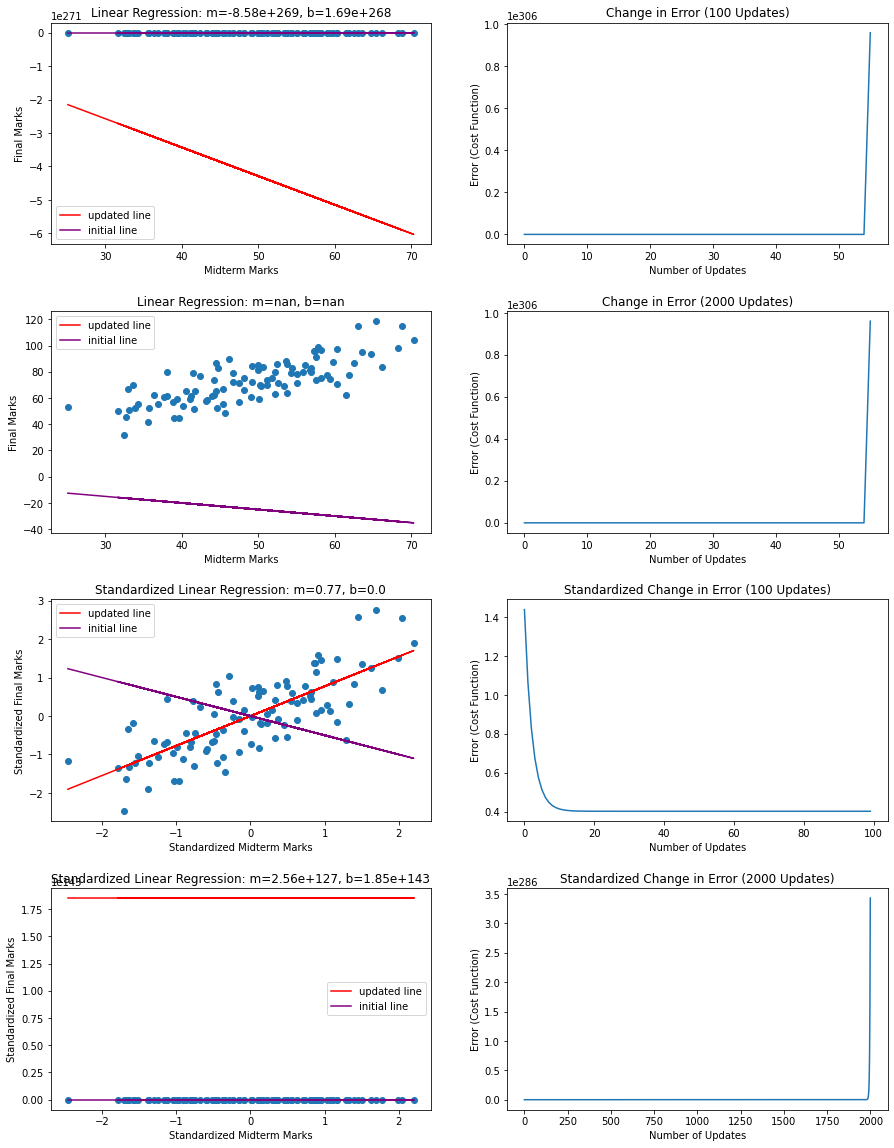

In [528]:
# Non Standardized Linear Regression
m, b, E = update(100, 0.1, x, y)
initial_line = -0.5 * x + 0
line = m * x + b

# Standardized Linear Regression
m_stand, b_stand, E_stand = update(100, 0.1, x_stand, y_stand)
initial_line_stand = -0.5 * x_stand + 0
line_stand = m_stand * x_stand + b_stand

%matplotlib inline
# Create four subplots in a 2 by 2 area
fig, pos = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.3)

# Row 0 Left: Non-Standardized with 100 updates
pos[0, 0].scatter(x, y)
pos[0, 0].set_title(f'Linear Regression: m={m:.2e}, b={b:.2e}')
pos[0, 0].set(xlabel='Midterm Marks', ylabel='Final Marks')
pos[0, 0].plot(x, line, color='red', label='updated line')
pos[0, 0].plot(x, initial_line, color='purple', label='initial line')
pos[0, 0].legend()

# Row 0 Right: Non-Standardized Error Updates with 100 updates
pos[0, 1].set_title(f'Change in Error (100 Updates)')
pos[0, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[0, 1].plot(range(100), E)

# Row 2 Left: Standardized with 100 updates
pos[2, 0].scatter(x_stand, y_stand)
pos[2, 0].set_title(f'Standardized Linear Regression: m={round(m_stand, 2)}, b={round(b_stand, 2)}')
pos[2, 0].set(xlabel='Standardized Midterm Marks', ylabel='Standardized Final Marks')
pos[2, 0].plot(x_stand, line_stand, color='red', label='updated line')
pos[2, 0].plot(x_stand, initial_line_stand, color='purple', label='initial line')
pos[2, 0].legend()

# Row 2 Right: Standardized Error Updates with 100 updates
pos[2, 1].set_title(f'Standardized Change in Error (100 Updates)')
pos[2, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[2, 1].plot(range(100), E_stand)

# Non Standardized Linear Regression
m, b, E = update(2000, 0.1, x, y)
initial_line = -0.5 * x + 0
line = m * x + b

# Standardized Linear Regression
m_stand, b_stand, E_stand = update(2000, 0.1, x_stand, y_stand)
initial_line_stand = -0.5 * x_stand + 0
line_stand = m_stand * x_stand + b_stand

# Row 1 Left: Non-Standardized with 2000 updates
pos[1, 0].scatter(x, y)
pos[1, 0].set_title(f'Linear Regression: m={m:.2e}, b={b:.2e}')
pos[1, 0].set(xlabel='Midterm Marks', ylabel='Final Marks')
pos[1, 0].plot(x, line, color='red', label='updated line')
pos[1, 0].plot(x, initial_line, color='purple', label='initial line')
pos[1, 0].legend()

# Row 1 Right: Non-Standardized Error Updates with 2000 updates
pos[1, 1].set_title(f'Change in Error (2000 Updates)')
pos[1, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[1, 1].plot(range(2000), E)

# Row 3 Left: Standardized with 2000 updates
pos[3, 0].scatter(x_stand, y_stand)
pos[3, 0].set_title(f'Standardized Linear Regression: m={m_stand:.2e}, b={b_stand:.2e}')
pos[3, 0].set(xlabel='Standardized Midterm Marks', ylabel='Standardized Final Marks')
pos[3, 0].plot(x_stand, line_stand, color='red', label='updated line')
pos[3, 0].plot(x_stand, initial_line_stand, color='purple', label='initial line')
pos[3, 0].legend()

# Row 3 Right: Standardized Error Updates with 2000 updates
pos[3, 1].set_title(f'Standardized Change in Error (2000 Updates)')
pos[3, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[3, 1].plot(range(2000), E_stand)

### Linear Regression and Error Graph using Standardized (sci-kit module) Values with a=0.0001:

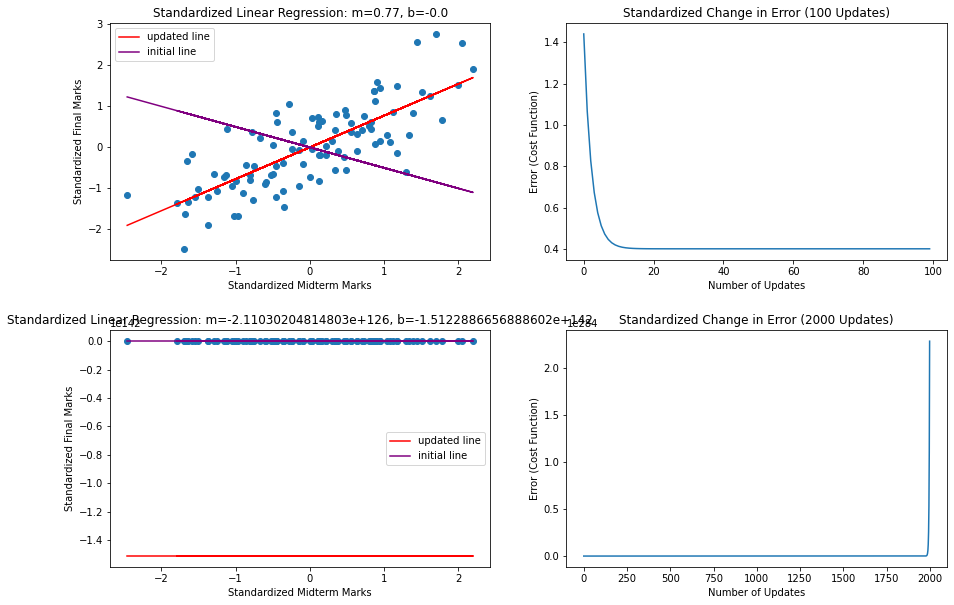

In [525]:
# Standardized Linear Regression
m_stand, b_stand, E_stand = update_sk(100, 0.0001)
initial_line_stand = [-0.5*x for x in x_sk]
line_stand =[m_stand*x+b_stand for x in x_sk]

%matplotlib inline
# Create four subplots in a 2 by 2 area
fig, pos = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.3)

# Row 0 Left: Standardized with 100 updates
pos[0, 0].scatter(x_stand, y_stand)
pos[0, 0].set_title(f'Standardized Linear Regression: m={round(m_stand, 2)}, b={round(b_stand, 2)}')
pos[0, 0].set(xlabel='Standardized Midterm Marks', ylabel='Standardized Final Marks')
pos[0, 0].plot(x_stand, line_stand, color='red', label='updated line')
pos[0, 0].plot(x_stand, initial_line_stand, color='purple', label='initial line')
pos[0, 0].legend()

# Row 0 Right: Standardized Error Updates with 100 updates
pos[0, 1].set_title(f'Standardized Change in Error (100 Updates)')
pos[0, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[0, 1].plot(range(100), E_stand)

# Standardized Linear Regression
m_stand, b_stand, E_stand = update_sk(2000, 0.0001)
initial_line_stand = [-0.5*x for x in x_sk]
line_stand = [m_stand*x+b_stand for x in x_sk]

# Row 1 Left: Standardized with 2000 updates
pos[1, 0].scatter(x_stand, y_stand)
pos[1, 0].set_title(f'Standardized Linear Regression: m={round(m_stand, 2)}, b={round(b_stand, 2)}')
pos[1, 0].set(xlabel='Standardized Midterm Marks', ylabel='Standardized Final Marks')
pos[1, 0].plot(x_stand, line_stand, color='red', label='updated line')
pos[1, 0].plot(x_stand, initial_line_stand, color='purple', label='initial line')
pos[1, 0].legend()

# Row 1 Right: Standardized Error Updates with 2000 updates
pos[1, 1].set_title(f'Standardized Change in Error (2000 Updates)')
pos[1, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[1, 1].plot(range(2000), E_stand)